In [76]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import matplotlib.pyplot as plt
import random

import cornac
from cornac.eval_methods import RatioSplit
from cornac.data import TextModality
from cornac.data.text import BaseTokenizer
from cornac.models import CTR
from cornac.data import Reader

In [6]:

# citeulike dataset
# docs_citeulike, item_ids_citeulike = cornac.datasets.citeulike.load_text()
# feedback_citeulike = cornac.datasets.citeulike.load_feedback(reader=Reader(item_set=item_ids_citeulike))
# item_text_modality = TextModality(
#     corpus=docs_citeulike,
#     ids=item_ids_citeulike,
#     tokenizer=BaseTokenizer(sep=" ", stop_words="english"),
#     max_vocab=8000,
#     max_doc_freq=0.5,
# )
# Define an evaluation method to split feedback into train and test sets
# citeulike_ratio_split = RatioSplit(
#     data=feedback_citeulike,
#     test_size=0.2,
#     exclude_unknowns=True,
#     item_text=item_text_modality,
#     verbose=True,
#     seed=123,
#     rating_threshold=1,
# )
#
# amazon_clothing dataset
# docs_clothing, item_ids_clothing = cornac.datasets.amazon_clothing.load_text()
# feedback_clothing = cornac.datasets.amazon_clothing.load_feedback(reader=Reader(item_set=item_ids_clothing))
# item_text_modality = TextModality(
#     corpus=docs_clothing,
#     ids=item_ids_clothing,
#     tokenizer=BaseTokenizer(sep=" ", stop_words="english"),
#     max_vocab=8000,
#     max_doc_freq=0.5,
# )
# # Define an evaluation method to split feedback into train and test sets
# clothing_ratio_split = RatioSplit(
#     data=feedback_clothing,
#     test_size=0.2,
#     exclude_unknowns=True,
#     item_text=item_text_modality,
#     verbose=True,
#     seed=123,
#     rating_threshold=1,
# )

# movielens dataset
# docs_movielens, item_ids_movielens = cornac.datasets.movielens.load_plot()
# feedback_movielens = cornac.datasets.movielens.load_feedback(variant="100K",reader=Reader(item_set=item_ids_movielens))
# movielens_item_text_modality = TextModality(
#     corpus=docs_movielens,
#     ids=item_ids_movielens,
#     tokenizer=BaseTokenizer(sep="\t", stop_words="english"),
#     max_vocab=8000,
#     max_doc_freq=0.5,
# )
# # Define an evaluation method to split feedback into train and test sets
# movieslens_ratio_split = RatioSplit(
#     data=feedback_movielens,
#     test_size=0.2,
#     exclude_unknowns=True,
#     item_text=movielens_item_text_modality,
#     verbose=True,
#     seed=123,
#     rating_threshold=1,
# )

# mind
with open ('../dataset/mind_algorithm_test.csv') as mind_file:
    mind = pd.read_csv(mind_file)
mind['story'] = mind['story'].astype('int')
# pre-process data to initialize ctr model
mind_feedback = mind.loc[:, ['user_id','item_id','rating']]
# feedback = cornac.data.Dataset.from_uir(mind_feedback.itertuples(index=False))
feedback_mind = mind_feedback.apply(lambda x: tuple(x), axis=1).values.tolist()
text_mind = list(mind['text'])
item_ids_mind = list(mind['item_id'])
# # Instantiate a TextModality, it makes it convenient to work with text auxiliary information
# mind_item_text_modality = TextModality(
#     corpus=text_mind,
#     ids=item_ids_mind,
#     tokenizer=BaseTokenizer(sep=" ", stop_words="english"),
#     max_vocab=8000,
#     max_doc_freq=0.5,
# )
# # Define an evaluation method to split feedback into train and test sets
# mind_ratio_split = RatioSplit(
#     data=feedback_mind,
#     test_size=0.2,
#     exclude_unknowns=True,
#     item_text=mind_item_text_modality,
#     verbose=False,
#     seed=123,
#     rating_threshold=0.5,
# )

rating_threshold = 1.0
exclude_unknowns = True


/Users/pigr/cornac/lib/python3.10/site-packages/cornac/data/dataset.py:361: UserWarning: 18 duplicated observations are removed!
  warnings.warn("%d duplicated observations are removed!" % dup_count)
/Users/pigr/cornac/lib/python3.10/site-packages/cornac/data/dataset.py:361: UserWarning: 5 duplicated observations are removed!
  warnings.warn("%d duplicated observations are removed!" % dup_count)


---
Training data:
Number of users = 5551
Number of items = 16949
Number of ratings = 168396
Max rating = 1.0
Min rating = 1.0
Global mean = 1.0
---
Test data:
Number of users = 5444
Number of items = 14146
Number of ratings = 42053
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 5551
Total items = 16949
rating_threshold = 1.0
exclude_unknowns = True
---
Training data:
Number of users = 5081
Number of items = 3326
Number of ratings = 10951
Max rating = 5.0
Min rating = 1.0
Global mean = 4.3
---
Test data:
Number of users = 1868
Number of items = 1453
Number of ratings = 2200
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 5081
Total items = 3326
rating_threshold = 1.0
exclude_unknowns = True
---
Training data:
Number of users = 943
Number of items = 1518
Number of ratings = 75846
Max rating = 5.0
Min rating = 1.0
Global mean = 3.5
---
Test data:
Number of users = 941
Number of items = 1279
Number of ratings = 18925
Number of unknown u

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/mind_algorithm_test.csv'

lamda_v = 100, epoch = 50, @TOPK = 200

In [43]:
len(mind[mind['rating']==1.0])

6897

In [49]:
len(mind[mind['rating']==0])

3103

In [35]:
docs_citeulike, item_ids_citeulike = cornac.datasets.citeulike.load_text()
feedback_citeulike = cornac.datasets.citeulike.load_feedback(reader=Reader(item_set=item_ids_citeulike))

In [44]:
len(feedback_citeulike)

210518

In [52]:
pd.DataFrame(feedback_citeulike).head()

,0,1,2
0,1,70,1.0
1,1,495,1.0
2,1,1631,1.0
3,1,2317,1.0
4,1,2526,1.0


In [54]:
# pre-process data to initialize ctr model
mind_feedback = mind.loc[:, ['user_id','item_id','rating']]
mind_feedback = mind_feedback[mind_feedback['rating']==1.0]
# feedback = cornac.data.Dataset.from_uir(mind_feedback.itertuples(index=False))
feedback = mind_feedback.apply(lambda x: tuple(x), axis=1).values.tolist()
text = list(mind['text'])
item_ids = list(mind['item_id'])
# Instantiate a TextModality, it makes it convenient to work with text auxiliary information
item_text_modality = TextModality(
    corpus=text,
    ids=item_ids,
    tokenizer=BaseTokenizer(sep=" ", stop_words="english"),
    max_vocab=8000,
    max_doc_freq=0.5,
)

# Define an evaluation method to split feedback into train and test sets
ratio_split = RatioSplit(
    data=feedback,
    test_size=0.2,
    exclude_unknowns=True,
    item_text=item_text_modality,
    verbose=True,
    seed=123,
    rating_threshold=0.5,
)

rating_threshold = 0.5
exclude_unknowns = True
---
Training data:
Number of users = 181
Number of items = 3156
Number of ratings = 5450
Max rating = 1.0
Min rating = 1.0
Global mean = 1.0
---
Test data:
Number of users = 159
Number of items = 599
Number of ratings = 813
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 181
Total items = 3156


/Users/pigr/cornac/lib/python3.10/site-packages/cornac/data/dataset.py:361: UserWarning: 67 duplicated observations are removed!
  warnings.warn("%d duplicated observations are removed!" % dup_count)
/Users/pigr/cornac/lib/python3.10/site-packages/cornac/data/dataset.py:361: UserWarning: 3 duplicated observations are removed!
  warnings.warn("%d duplicated observations are removed!" % dup_count)


I find that in citeulike dataset, all items' ratings are 1.0, which means that each item is seen by the user (cited), so for better training result on mind, I made a little change on training data from mind. In the original dataset, we produce the ratings based on the cliking history, "0" in the impression-logs means that even though this new appears in the user's page, the user didn't click it, so it means that he/she also didn't see the news, so I extract user-item data whose rating is 1.0 (Number is 6897), and train using ctr model, the recall increases from around 0.1 to 0.2426. So I put more data into training (around 200K, similar to citeulike), and recall increases to 0.3596, and I continuously increase data to 500K, the recall increases to 0.4387; increase to 1M, recall increases to 0.5128. So finally do we need to limit the data size?

In [55]:

# Instantiate CTR model
ctr = cornac.models.CTR(k=50, max_iter=50, lambda_v=1)

# Use Recall@300 for evaluation
rec_300 = cornac.metrics.Recall(k=300)

# Put everything together into an experiment and run it
cornac.Experiment(eval_method=ratio_split, models=[ctr], metrics=[rec_300]).run()


[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/159 [00:00<?, ?it/s]


TEST:
...
    | Recall@300 | Train (s) | Test (s)
--- + ---------- + --------- + --------
CTR |     0.2426 |   49.6719 |   0.2031



In [58]:
# pre-process data to initialize ctr model
mind_feedback = mind.loc[:, ['user_id','item_id','rating']]
mind_feedback = mind_feedback[mind_feedback['rating']==1.0]
# feedback = cornac.data.Dataset.from_uir(mind_feedback.itertuples(index=False))
feedback = mind_feedback.apply(lambda x: tuple(x), axis=1).values.tolist()
text = list(mind['text'])
item_ids = list(mind['item_id'])
# Instantiate a TextModality, it makes it convenient to work with text auxiliary information
item_text_modality = TextModality(
    corpus=text,
    ids=item_ids,
    tokenizer=BaseTokenizer(sep=" ", stop_words="english"),
    max_vocab=8000,
    max_doc_freq=0.5,
)

# Define an evaluation method to split feedback into train and test sets
ratio_split = RatioSplit(
    data=feedback,
    test_size=0.2,
    exclude_unknowns=True,
    item_text=item_text_modality,
    verbose=True,
    seed=123,
    rating_threshold=1,
)


# Instantiate CTR model
ctr = cornac.models.CTR(k=50, max_iter=50, lambda_v=1)

# Use Recall@300 for evaluation
rec_300 = cornac.metrics.Recall(k=300)

# Put everything together into an experiment and run it
cornac.Experiment(eval_method=ratio_split, models=[ctr], metrics=[rec_300]).run()

rating_threshold = 1.0
exclude_unknowns = True
---
Training data:
Number of users = 181
Number of items = 3156
Number of ratings = 5450
Max rating = 1.0
Min rating = 1.0
Global mean = 1.0
---
Test data:
Number of users = 159
Number of items = 599
Number of ratings = 813
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 181
Total items = 3156


/Users/pigr/cornac/lib/python3.10/site-packages/cornac/data/dataset.py:361: UserWarning: 67 duplicated observations are removed!
  warnings.warn("%d duplicated observations are removed!" % dup_count)
/Users/pigr/cornac/lib/python3.10/site-packages/cornac/data/dataset.py:361: UserWarning: 3 duplicated observations are removed!
  warnings.warn("%d duplicated observations are removed!" % dup_count)



[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/159 [00:00<?, ?it/s]


TEST:
...
    | Recall@300 | Train (s) | Test (s)
--- + ---------- + --------- + --------
CTR |     0.2625 |   48.7320 |   0.1876



In [59]:

# pre-process data to initialize ctr model
mind_feedback = mind.loc[:, ['user_id', 'item_id', 'rating']]
mind_feedback = mind_feedback[mind_feedback['rating'] == 1.0]
# feedback = cornac.data.Dataset.from_uir(mind_feedback.itertuples(index=False))
feedback = mind_feedback.apply(lambda x: tuple(x), axis=1).values.tolist()
text = list(mind['text'])
item_ids = list(mind['item_id'])
# Instantiate a TextModality, it makes it convenient to work with text auxiliary information
item_text_modality = TextModality(
    corpus=text,
    ids=item_ids,
    tokenizer=BaseTokenizer(sep=" ", stop_words="english"),
    max_vocab=8000,
    max_doc_freq=0.5,
)

# Define an evaluation method to split feedback into train and test sets
ratio_split = RatioSplit(
    data=feedback,
    test_size=0.2,
    exclude_unknowns=True,
    item_text=item_text_modality,
    verbose=True,
    seed=123,
    rating_threshold=0,
)

# Instantiate CTR model
ctr = cornac.models.CTR(k=50, max_iter=50, lambda_v=1)

# Use Recall@300 for evaluation
rec_300 = cornac.metrics.Recall(k=300)

# Put everything together into an experiment and run it
cornac.Experiment(eval_method=ratio_split, models=[ctr], metrics=[rec_300]).run()

rating_threshold = 0.0
exclude_unknowns = True
---
Training data:
Number of users = 181
Number of items = 3156
Number of ratings = 5450
Max rating = 1.0
Min rating = 1.0
Global mean = 1.0
---
Test data:
Number of users = 159
Number of items = 599
Number of ratings = 813
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 181
Total items = 3156


/Users/pigr/cornac/lib/python3.10/site-packages/cornac/data/dataset.py:361: UserWarning: 67 duplicated observations are removed!
  warnings.warn("%d duplicated observations are removed!" % dup_count)
/Users/pigr/cornac/lib/python3.10/site-packages/cornac/data/dataset.py:361: UserWarning: 3 duplicated observations are removed!
  warnings.warn("%d duplicated observations are removed!" % dup_count)



[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/159 [00:00<?, ?it/s]


TEST:
...
    | Recall@300 | Train (s) | Test (s)
--- + ---------- + --------- + --------
CTR |     0.2134 |   44.5635 |   0.1629



In [65]:
print(max(ctr.rank(0)[1]))
print(min(ctr.rank(0)[1]))

1.0703665
-0.53519183


In [69]:
# amazon_clothing dataset
docs_clothing, item_ids_clothing = cornac.datasets.amazon_clothing.load_text()
feedback_clothing = cornac.datasets.amazon_clothing.load_feedback(reader=Reader(item_set=item_ids_clothing))

In [72]:
# mind
with open ('../dataset/mind_test_200K.csv') as mind_file:
    mind = pd.read_csv(mind_file)
mind['story'] = mind['story'].astype('int')
# pre-process data to initialize ctr model
mind_feedback = mind.loc[:, ['user_id','item_id','rating']]
mind_feedback = mind_feedback[mind_feedback['rating']==1.0]
len(mind_feedback)

200000

In [73]:

# feedback = cornac.data.Dataset.from_uir(mind_feedback.itertuples(index=False))
feedback = mind_feedback.apply(lambda x: tuple(x), axis=1).values.tolist()
text = list(mind['text'])
item_ids = list(mind['item_id'])
# Instantiate a TextModality, it makes it convenient to work with text auxiliary information
item_text_modality = TextModality(
    corpus=text,
    ids=item_ids,
    tokenizer=BaseTokenizer(sep=" ", stop_words="english"),
    max_vocab=8000,
    max_doc_freq=0.5,
)

# Define an evaluation method to split feedback into train and test sets
ratio_split = RatioSplit(
    data=feedback,
    test_size=0.2,
    exclude_unknowns=True,
    item_text=item_text_modality,
    verbose=True,
    seed=123,
    rating_threshold=0.5,
)


# Instantiate CTR model
ctr = cornac.models.CTR(k=50, max_iter=50, lambda_v=1)

# Use Recall@300 for evaluation
rec_300 = cornac.metrics.Recall(k=300)

# Put everything together into an experiment and run it
cornac.Experiment(eval_method=ratio_split, models=[ctr], metrics=[rec_300]).run()

rating_threshold = 0.5
exclude_unknowns = True
---
Training data:
Number of users = 5609
Number of items = 15063
Number of ratings = 137472
Max rating = 1.0
Min rating = 1.0
Global mean = 1.0


/Users/pigr/cornac/lib/python3.10/site-packages/cornac/data/dataset.py:361: UserWarning: 22528 duplicated observations are removed!
  warnings.warn("%d duplicated observations are removed!" % dup_count)
/Users/pigr/cornac/lib/python3.10/site-packages/cornac/data/dataset.py:361: UserWarning: 1572 duplicated observations are removed!
  warnings.warn("%d duplicated observations are removed!" % dup_count)


---
Test data:
Number of users = 4932
Number of items = 8191
Number of ratings = 37321
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 5609
Total items = 15063

[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/4932 [00:00<?, ?it/s]


TEST:
...
    | Recall@300 | Train (s) | Test (s)
--- + ---------- + --------- + --------
CTR |     0.3596 |  223.5423 |   8.2025



## -----------------------------------

### amazon_clothing

In [79]:
# amazon_clothing dataset
docs_clothing, item_ids_clothing = cornac.datasets.amazon_clothing.load_text()
feedback_clothing = cornac.datasets.amazon_clothing.load_feedback(reader=Reader(item_set=item_ids_clothing))
clothing_item_text_modality = TextModality(
    corpus=docs_clothing,
    ids=item_ids_clothing,
    tokenizer=BaseTokenizer(sep=" ", stop_words="english"),
    max_vocab=8000,
    max_doc_freq=0.5,
)
# Define an evaluation method to split feedback into train and test sets
clothing_ratio_split = RatioSplit(
    data=feedback_clothing,
    test_size=0.2,
    exclude_unknowns=True,
    item_text=clothing_item_text_modality,
    verbose=True,
    seed=123,
    rating_threshold=1,
)

# Instantiate CTR model
ctr = cornac.models.CTR(k=50, max_iter=50, lambda_v=1)

# Use Recall@300 for evaluation
rec_300 = cornac.metrics.Recall(k=300)

# Put everything together into an experiment and run it
cornac.Experiment(eval_method=clothing_ratio_split, models=[ctr], metrics=[rec_300]).run()

rating_threshold = 1.0
exclude_unknowns = True
---
Training data:
Number of users = 5081
Number of items = 3326
Number of ratings = 10951
Max rating = 5.0
Min rating = 1.0
Global mean = 4.3
---
Test data:
Number of users = 1868
Number of items = 1453
Number of ratings = 2200
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 5081
Total items = 3326

[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/1868 [00:00<?, ?it/s]


TEST:
...
    | Recall@300 | Train (s) | Test (s)
--- + ---------- + --------- + --------
CTR |     0.3497 |   67.5905 |   1.4467



### movielens_100K
the number of movielens doesn't affect text_modality

In [80]:
docs_movielens, item_ids_movielens = cornac.datasets.movielens.load_plot()
print(len(docs_movielens))
print(len(item_ids_movielens))

10076
10076


In [81]:
feedback_movielens_100K = cornac.datasets.movielens.load_feedback(variant="100K",reader=Reader(item_set=item_ids_movielens))
print(len(feedback_movielens_100K))

94808


In [82]:
docs_movielens, item_ids_movielens = cornac.datasets.movielens.load_plot()
feedback_movielens_100K = cornac.datasets.movielens.load_feedback(variant="100K",reader=Reader(item_set=item_ids_movielens))

movielens_item_text_modality = TextModality(
    corpus=docs_movielens,
    ids=item_ids_movielens,
    tokenizer=BaseTokenizer(sep="\t", stop_words="english"),
    max_vocab=8000,
    max_doc_freq=0.5,
)
# Define an evaluation method to split feedback into train and test sets
movieslens100K_ratio_split = RatioSplit(
    data=feedback_movielens_100K,
    test_size=0.2,
    exclude_unknowns=True,
    item_text=movielens_item_text_modality,
    verbose=True,
    seed=123,
    rating_threshold=1,
)

# Instantiate CTR model
ctr = cornac.models.CTR(k=50, max_iter=50, lambda_v=1)

# Use Recall@300 for evaluation
rec_300 = cornac.metrics.Recall(k=300)

# Put everything together into an experiment and run it
cornac.Experiment(eval_method=movieslens100K_ratio_split, models=[ctr], metrics=[rec_300]).run()

rating_threshold = 1.0
exclude_unknowns = True
---
Training data:
Number of users = 943
Number of items = 1518
Number of ratings = 75846
Max rating = 5.0
Min rating = 1.0
Global mean = 3.5
---
Test data:
Number of users = 941
Number of items = 1279
Number of ratings = 18925
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 943
Total items = 1518

[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/941 [00:00<?, ?it/s]


TEST:
...
    | Recall@300 | Train (s) | Test (s)
--- + ---------- + --------- + --------
CTR |     0.7160 |   35.7158 |   0.4193



### movielens_1M

In [83]:
docs_movielens, item_ids_movielens = cornac.datasets.movielens.load_plot()
feedback_movielens_1M = cornac.datasets.movielens.load_feedback(variant="1M",reader=Reader(item_set=item_ids_movielens))

movielens_item_text_modality = TextModality(
    corpus=docs_movielens,
    ids=item_ids_movielens,
    tokenizer=BaseTokenizer(sep="\t", stop_words="english"),
    max_vocab=8000,
    max_doc_freq=0.5,
)
# Define an evaluation method to split feedback into train and test sets
movieslens1M_ratio_split = RatioSplit(
    data=feedback_movielens_1M,
    test_size=0.2,
    exclude_unknowns=True,
    item_text=movielens_item_text_modality,
    verbose=True,
    seed=123,
    rating_threshold=1,
)

# Instantiate CTR model
ctr = cornac.models.CTR(k=50, max_iter=50, lambda_v=1)

# Use Recall@300 for evaluation
rec_300 = cornac.metrics.Recall(k=300)

# Put everything together into an experiment and run it
cornac.Experiment(eval_method=movieslens1M_ratio_split, models=[ctr], metrics=[rec_300]).run()

Data from http://files.grouplens.org/datasets/movielens/ml-1m.zip
will be cached into /Users/pigr/.cornac/ml-1m/ratings.dat


0.00B [00:00, ?B/s]

Unzipping ...
File cached!
rating_threshold = 1.0
exclude_unknowns = True
---
Training data:
Number of users = 6040
Number of items = 3528
Number of ratings = 794785
Max rating = 5.0
Min rating = 1.0
Global mean = 3.6
---
Test data:
Number of users = 6036
Number of items = 3339
Number of ratings = 198681
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 6040
Total items = 3528

[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/6036 [00:00<?, ?it/s]


TEST:
...
    | Recall@300 | Train (s) | Test (s)
--- + ---------- + --------- + --------
CTR |     0.6092 |  102.9871 |   4.3817



### citeulike

In [84]:
# citeulike dataset
docs_citeulike, item_ids_citeulike = cornac.datasets.citeulike.load_text()
feedback_citeulike = cornac.datasets.citeulike.load_feedback(reader=Reader(item_set=item_ids_citeulike))
item_text_modality = TextModality(
    corpus=docs_citeulike,
    ids=item_ids_citeulike,
    tokenizer=BaseTokenizer(sep=" ", stop_words="english"),
    max_vocab=8000,
    max_doc_freq=0.5,
)
# Define an evaluation method to split feedback into train and test sets
citeulike_ratio_split = RatioSplit(
    data=feedback_citeulike,
    test_size=0.2,
    exclude_unknowns=True,
    item_text=item_text_modality,
    verbose=True,
    seed=123,
    rating_threshold=1,
)

# Instantiate CTR model
ctr = cornac.models.CTR(k=50, max_iter=50, lambda_v=1)

# Use Recall@300 for evaluation
rec_300 = cornac.metrics.Recall(k=300)

# Put everything together into an experiment and run it
cornac.Experiment(eval_method=citeulike_ratio_split, models=[ctr], metrics=[rec_300]).run()

rating_threshold = 1.0
exclude_unknowns = True


/Users/pigr/cornac/lib/python3.10/site-packages/cornac/data/dataset.py:361: UserWarning: 18 duplicated observations are removed!
  warnings.warn("%d duplicated observations are removed!" % dup_count)
/Users/pigr/cornac/lib/python3.10/site-packages/cornac/data/dataset.py:361: UserWarning: 5 duplicated observations are removed!
  warnings.warn("%d duplicated observations are removed!" % dup_count)


---
Training data:
Number of users = 5551
Number of items = 16949
Number of ratings = 168396
Max rating = 1.0
Min rating = 1.0
Global mean = 1.0
---
Test data:
Number of users = 5444
Number of items = 14146
Number of ratings = 42053
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 5551
Total items = 16949

[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/5444 [00:00<?, ?it/s]


TEST:
...
    | Recall@300 | Train (s) | Test (s)
--- + ---------- + --------- + --------
CTR |     0.6323 |  219.9024 |  10.7622



In [86]:
dir(ctr)

['U',
 'V',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_data',
 '_fit_ctr',
 '_get_init_params',
 '_init',
 'a',
 'b',
 'best_epoch',
 'best_value',
 'clone',
 'current_epoch',
 'default_score',
 'early_stop',
 'eta',
 'fit',
 'ignored_attrs',
 'init_params',
 'k',
 'lambda_u',
 'lambda_v',
 'load',
 'max_iter',
 'model',
 'monitor_value',
 'n_item',
 'n_user',
 'name',
 'rank',
 'rate',
 'reset_info',
 'save',
 'score',
 'seed',
 'stopped_epoch',
 'train_set',
 'trainable',
 'val_set',
 'verbose',
 'wait']

I find that in citeulike dataset, all items’ ratings are 1.0, which means that each item is seen by the user (cited), so for better training result on mind, I made a little change on training data from mind. In the original dataset, we produce the ratings based on the cliking history, “0” in the impression-logs means that even though this new appears in the user’s page, the user didn’t click it, so it means that he/she also didn’t see the news, so I extract user-item data whose rating is 1.0 (Number is 6897), and train using ctr model, the recall increases from around 0.1 to 0.2426. So I put more data into training (around 200K, similar to citeulike), and recall increases to 0.3596, and I continuously increase data to 500K, the recall increases to 0.4387; increase to 1M, recall increases to 0.5128. So finally do we need to limit the data size?

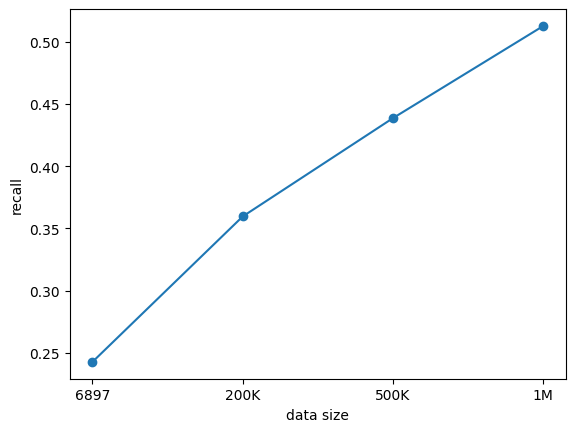

In [88]:
x = ['6897', '200K', '500K', '1M']
y = [0.2426, 0.3596, 0.4387, 0.5128]
plt.plot(x, y, marker='o')
plt.xlabel("data size")
plt.ylabel("recall")
plt.show()

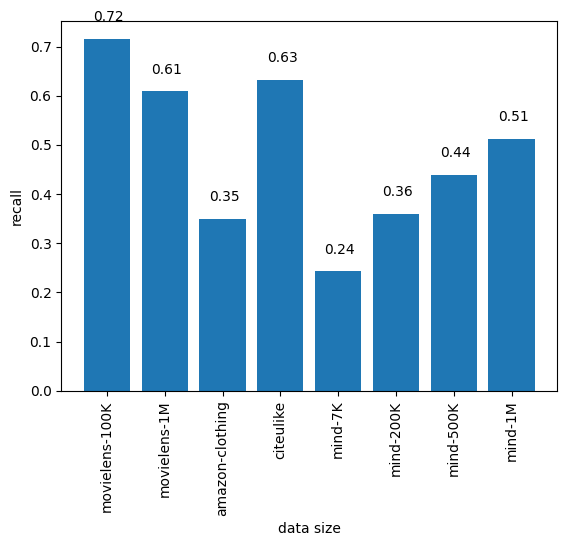

In [103]:
label_list = ['movielens-100K','movielens-1M','amazon-clothing','citeulike','mind-7K','mind-200K','mind-500K','mind-1M']
x = np.arange(len(label_list))
y = [0.7160,0.6092,0.3497,0.6323,0.2426, 0.3596, 0.4387, 0.5128]
plt.bar(x,y)
for x,y in zip(x,y):
    plt.text(x+0.03,y+0.03,'%.2f' %y, ha='center',va='bottom')
plt.xticks([0,1,2,3,4,5,6,7],label_list,rotation=90)
plt.xlabel("data size")
plt.ylabel("recall")
plt.show()